In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from mpl_toolkits.mplot3d import Axes3D

In [3]:
df_orbit = pd.read_csv('../datasets/final_orbit.csv')
df_impact = pd.read_csv('../datasets/final_impact.csv')

In [3]:
df_orbit.head()

,Object Name,Object Classification,Epoch (TDB),Orbit Axis (AU),Orbit Eccentricity,Orbit Inclination (deg),Perihelion Argument (deg),Node Longitude (deg),Mean Anomoly (deg),Perihelion Distance (AU),Aphelion Distance (AU),Orbital Period (yr),Minimum Orbit Intersection Distance (AU),Orbital Reference,Asteroid Magnitude
0,433 Eros,Amor Asteroid,57800,1.4579,0.2226,10.8277,178.8050,304.3265,319.3111,1.1335,1.78,1.76,0.1492,598,11.16
1,719 Albert,Amor Asteroid,57800,2.6385,0.5479,11.5822,156.1409,183.9204,224.5535,1.1928,4.08,4.29,0.2004,78,15.50
2,887 Alinda,Amor Asteroid,57800,2.4787,0.5671,9.3561,350.3482,110.5444,351.3730,1.0731,3.88,3.90,0.0925,188,13.40
3,1036 Ganymed,Amor Asteroid,57800,2.6628,0.5338,26.6929,132.4690,215.5551,92.5640,1.2413,4.08,4.35,0.3421,597,9.45
4,1221 Amor,Amor Asteroid,57800,1.9191,0.4356,11.8795,26.6572,171.3448,313.7379,1.0832,2.76,2.66,0.1068,70,17.70


In [4]:
df_impact.head()

,Object Name,Period Start,Period End,Possible Impacts,Cumulative Impact Probability,Asteroid Velocity,Asteroid Magnitude,Asteroid Diameter (km),Cumulative Palermo Scale,Maximum Palermo Scale,Maximum Torino Scale
0,2006 WP1,2017,2017,1,5.200000e-09,17.77,28.3,0.007,-8.31,-8.31,0
1,2013 YB,2017,2046,23,7.600000e-05,8.98,31.4,0.002,-6.60,-6.96,0
2,2008 US,2017,2062,30,1.600000e-05,18.33,31.4,0.002,-6.48,-6.87,0
3,2010 VR139,2017,2076,24,2.000000e-07,4.99,26.7,0.016,-6.83,-6.95,0
4,2015 ME131,2017,2096,85,2.300000e-08,19.46,19.2,0.497,-3.85,-4.30,0


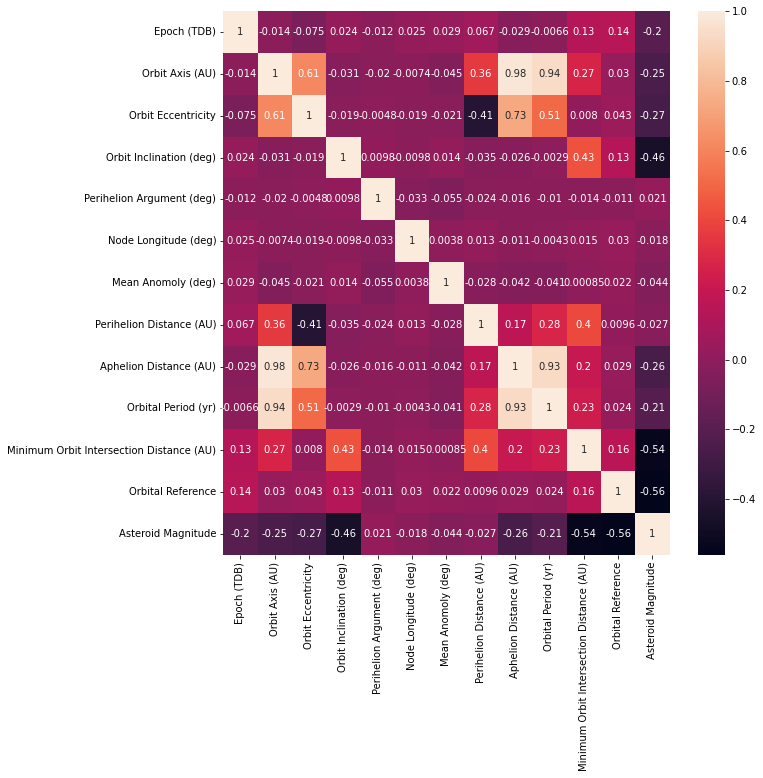

In [6]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_orbit.corr(), annot=True)
plt.show()

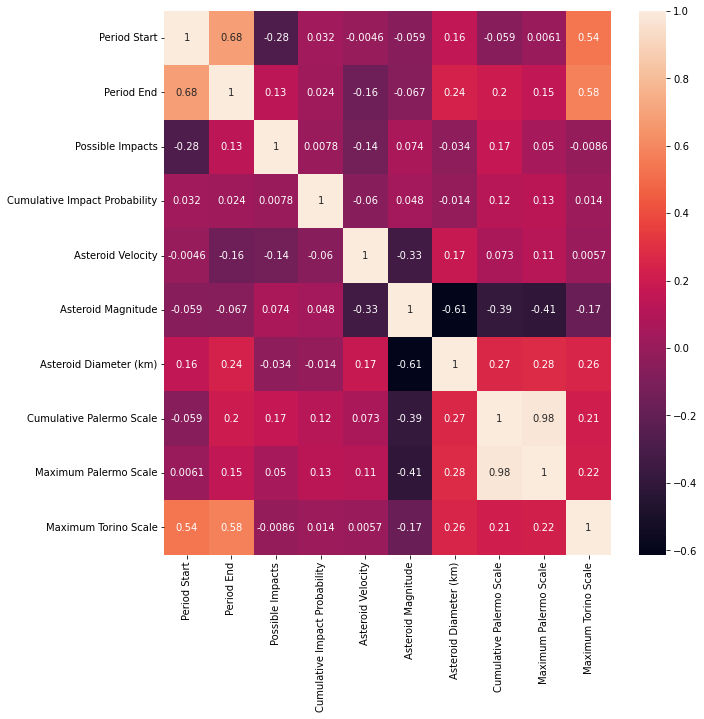

In [7]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_impact.corr(), annot=True)
plt.show()

In [23]:
def show_voilin_plot(df, features):
    n = len(features)
    cols = 3
    rows = int(n / cols)
    feat_iter = 0

    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(20, 25))
    for i in range(rows):
        for j in range(cols):
            sns.violinplot(x=features[feat_iter], data=df, ax=ax[i][j])
            feat_iter += 1
    plt.show()

In [40]:
orbit_column_list = list(df_orbit.columns)
orbit_column_list.remove('Object Classification')
orbit_column_list.remove('Object Name')
orbit_column_list

['Epoch (TDB)',
 'Orbit Axis (AU)',
 'Orbit Eccentricity',
 'Orbit Inclination (deg)',
 'Perihelion Argument (deg)',
 'Node Longitude (deg)',
 'Mean Anomoly (deg)',
 'Perihelion Distance (AU)',
 'Aphelion Distance (AU)',
 'Orbital Period (yr)',
 'Minimum Orbit Intersection Distance (AU)',
 'Orbital Reference',
 'Asteroid Magnitude']

In [42]:
impact_column_list = list(df_impact.columns)
impact_column_list.remove('Object Name')
impact_column_list

['Period Start',
 'Period End',
 'Possible Impacts',
 'Cumulative Impact Probability',
 'Asteroid Velocity',
 'Asteroid Magnitude',
 'Asteroid Diameter (km)',
 'Cumulative Palermo Scale',
 'Maximum Palermo Scale',
 'Maximum Torino Scale']

## Orbit Dataset

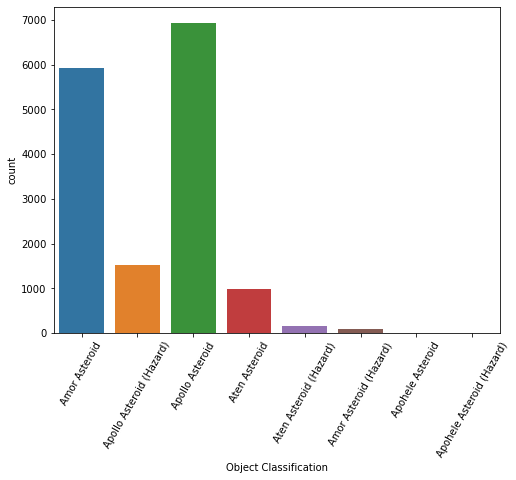

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_orbit, x='Object Classification')
plt.xticks(rotation=60)
plt.show()

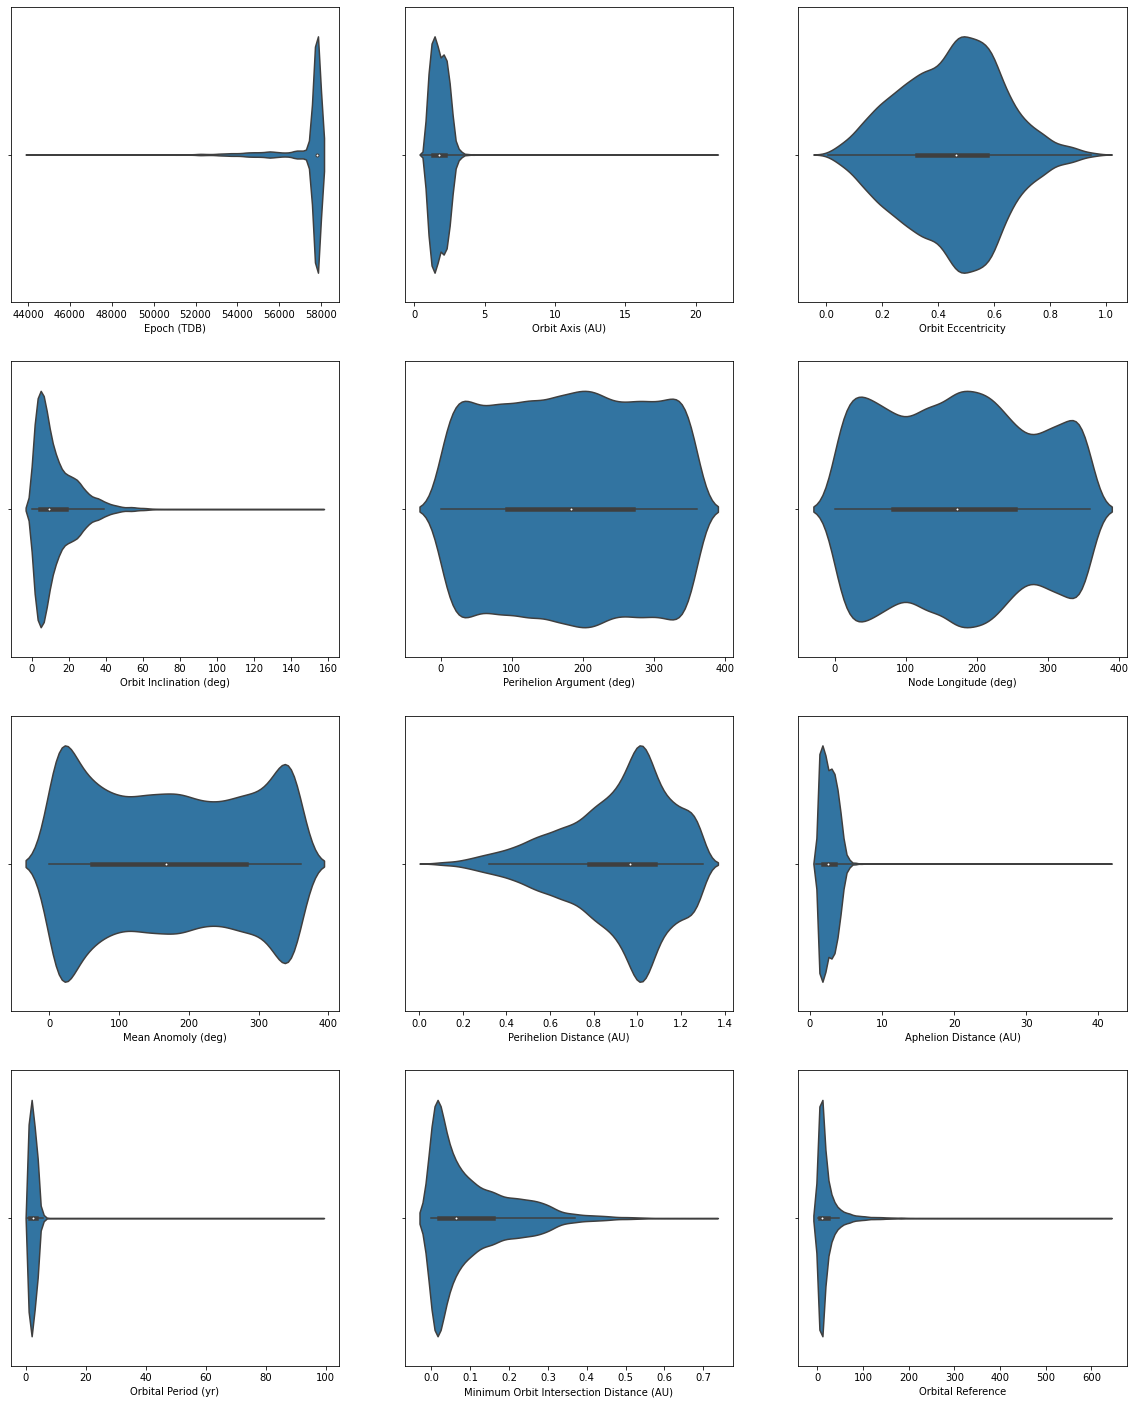

In [39]:
show_voilin_plot(df_orbit, orbit_column_list)

In [15]:
cmap = {'Amor Asteroid': 'tab:red',
 'Apollo Asteroid (Hazard)': 'tab:blue',
 'Apollo Asteroid': 'tab:green',
 'Aten Asteroid': 'tab:purple',
 'Aten Asteroid (Hazard)': 'tab:brown',
 'Amor Asteroid (Hazard)': 'tab:orange',
 'Apohele Asteroid': 'tab:pink',
 'Apohele Asteroid (Hazard)': 'tab:orange'}

In [17]:
# colors = []
# for object_class in df_orbit['Object Classification']:
#     colors.append(cmap[object_class])
# colors

In [36]:
df_sample_orbit = df_orbit.sample(5000)

In [37]:
colors = []
for object_class in df_sample_orbit['Object Classification']:
    colors.append(cmap[object_class])
# colors

(0.0, 10.0)

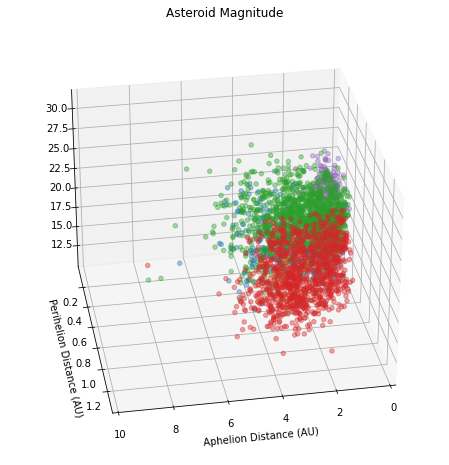

In [39]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x, y, z = (df_sample_orbit['Aphelion Distance (AU)'][:3000],
           df_sample_orbit['Perihelion Distance (AU)'][:3000],
           df_sample_orbit['Asteroid Magnitude'][:3000])
ax.scatter(x, y, z, c=colors[:3000], alpha=0.4)
ax.view_init(30, 80)
plt.xlabel('Aphelion Distance (AU)')
plt.ylabel('Perihelion Distance (AU)')
plt.title('Asteroid Magnitude')
plt.xlim((0, 10))

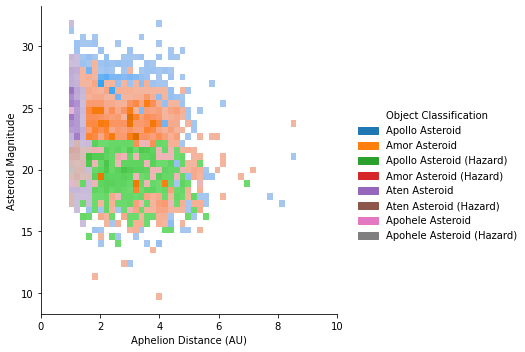

In [41]:
p = sns.displot(df_sample_orbit, x="Aphelion Distance (AU)", y="Asteroid Magnitude", hue="Object Classification")
p = p.set(xlim=(0,10))

C:\Users\nihal\Anaconda3\envs\MLprojects\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


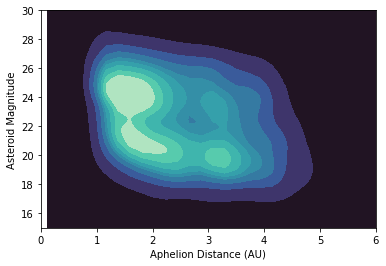

In [47]:
sns.kdeplot(df_orbit['Aphelion Distance (AU)'], 
            df_orbit['Asteroid Magnitude'], color='b',
            shade=True,
            cmap="mako", thresh=0).set(xlim=(0,6),ylim=(15,30))
plt.show()

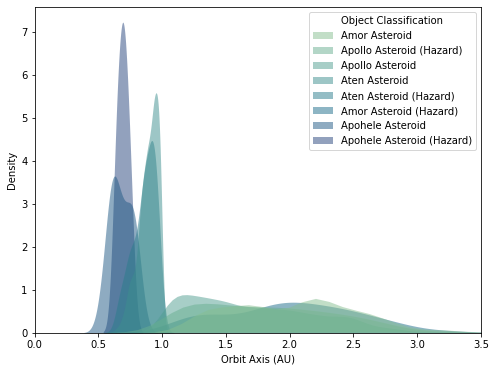

In [50]:
plt.figure(figsize=(8, 6))
g = sns.kdeplot(
   data=df_orbit, x="Orbit Axis (AU)", hue="Object Classification",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
).set(xlim=(0,3.5))
plt.show()

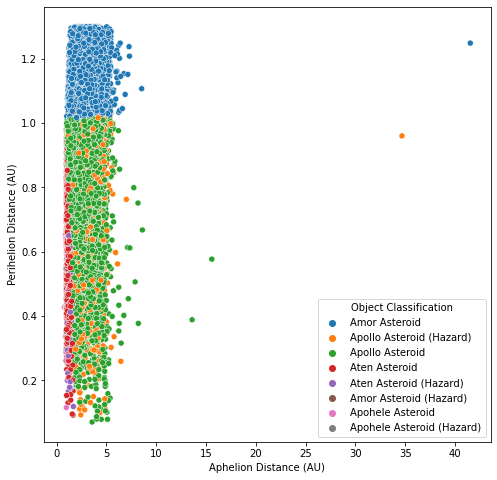

In [8]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x='Aphelion Distance (AU)', y='Perihelion Distance (AU)', hue='Object Classification', data=df_orbit)
plt.show()

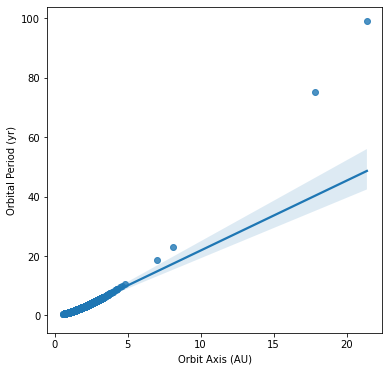

In [13]:
plt.figure(figsize=(6, 6))
sns.regplot(x='Orbit Axis (AU)', y='Orbital Period (yr)', data=df_orbit)
plt.show()

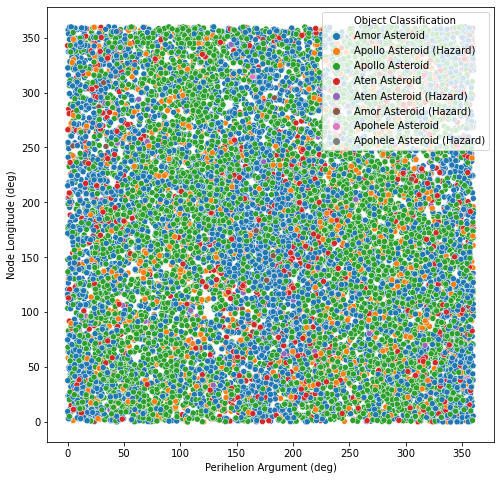

In [14]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x='Perihelion Argument (deg)', y='Node Longitude (deg)', hue='Object Classification', data=df_orbit)
plt.show()

If we observer carefully we can see that blue and green form certain patterns

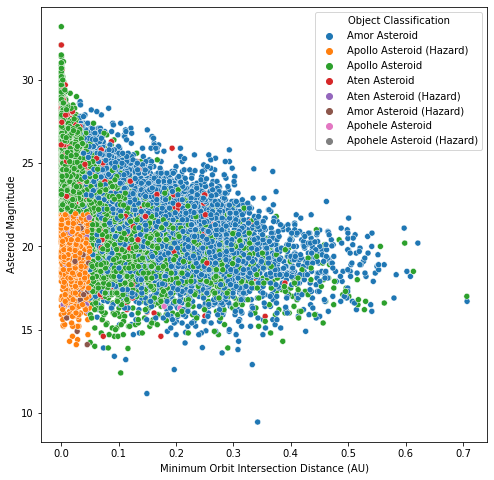

In [17]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x='Minimum Orbit Intersection Distance (AU)', y='Asteroid Magnitude', hue='Object Classification', data=df_orbit)
plt.show()

## Impact dataset

Text(0.5, 0.92, 'Cumulative Impact Probability')

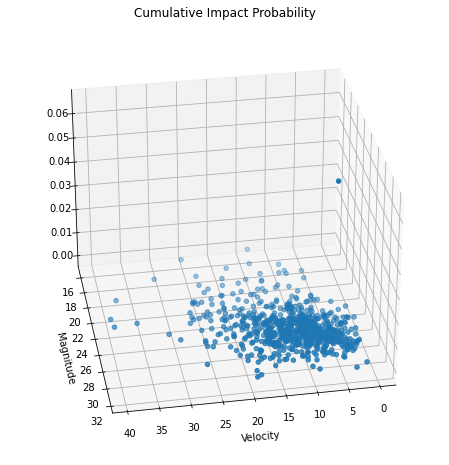

In [21]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x, y, z = (df_impact['Asteroid Velocity'],
           df_impact['Asteroid Magnitude'],
           df_impact['Cumulative Impact Probability'])
ax.scatter(x, y, z)
ax.view_init(30, 80)
plt.xlabel('Velocity')
plt.ylabel('Magnitude')
plt.title('Cumulative Impact Probability')

Text(0.5, 0.92, 'Possible Impacts')

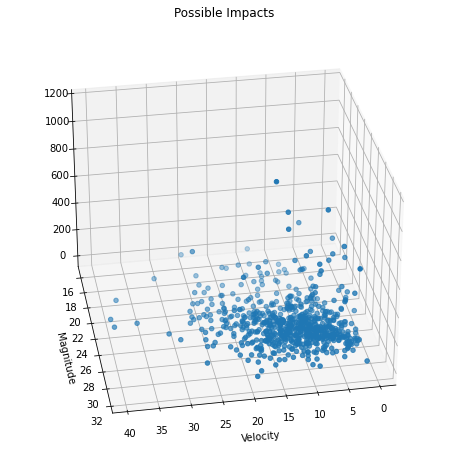

In [22]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x, y, z = (df_impact['Asteroid Velocity'],
           df_impact['Asteroid Magnitude'],
           df_impact['Possible Impacts'])
ax.scatter(x, y, z)
ax.view_init(30, 80)
plt.xlabel('Velocity')
plt.ylabel('Magnitude')
plt.title('Possible Impacts')

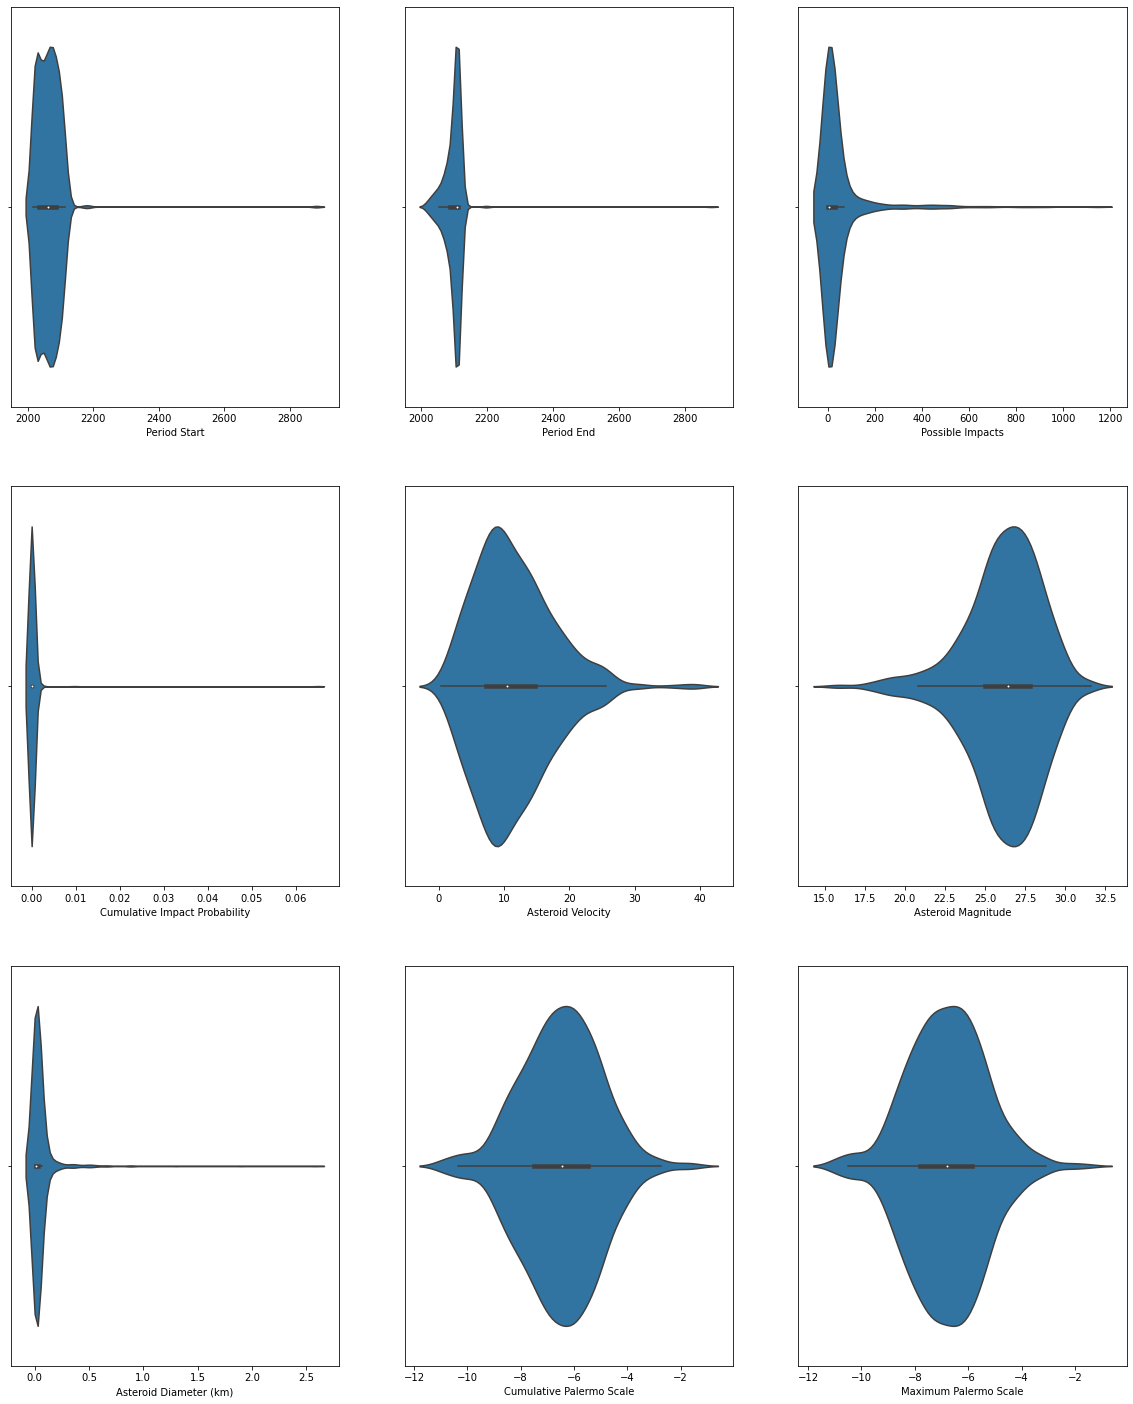

In [43]:
show_voilin_plot(df_impact, impact_column_list)

In [28]:
impact_group_start = df_impact.groupby('Period Start').agg({'Possible Impacts': np.sum, 'Cumulative Impact Probability': np.mean ,'Asteroid Velocity': np.mean, 'Asteroid Magnitude': np.mean ,'Asteroid Diameter (km)': np.mean, 'Cumulative Palermo Scale': np.mean})
impact_group_end = df_impact.groupby('Period End').agg({'Possible Impacts': np.sum, 'Cumulative Impact Probability': np.mean ,'Asteroid Velocity': np.mean, 'Asteroid Magnitude': np.mean ,'Asteroid Diameter (km)': np.mean, 'Cumulative Palermo Scale': np.mean})

In [29]:
impact_group_start

,Possible Impacts,Cumulative Impact Probability,Asteroid Velocity,Asteroid Magnitude,Asteroid Diameter (km),Cumulative Palermo Scale
Period Start,,,,,,
2017,8356,6.581700e-06,9.106923,26.415385,0.046231,-6.160385
2018,2381,2.349523e-06,13.820769,24.661538,0.097846,-5.880769
2019,1772,9.732750e-06,12.965833,23.733333,0.123167,-4.916667
2020,3771,1.369359e-05,10.385217,25.330435,0.143435,-5.819130
2021,1189,3.302550e-06,12.853846,25.100000,0.074769,-6.676154
...,...,...,...,...,...,...
2114,12,8.266667e-06,10.180000,24.800000,0.044000,-5.570000
2115,3,1.123333e-07,9.276667,27.633333,0.012667,-8.850000
2175,78,3.700000e-04,5.990000,20.200000,0.490000,-1.710000


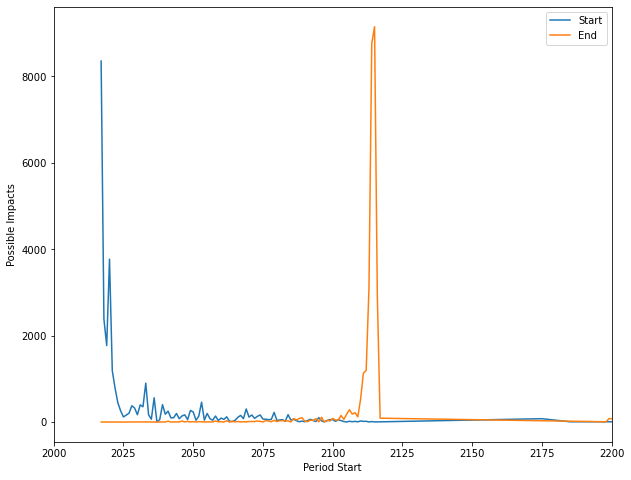

In [31]:
plt.figure(figsize=(10, 8))
sns.lineplot(x=impact_group_start.index, y='Possible Impacts', data=impact_group_start, label="Start")
sns.lineplot(x=impact_group_end.index, y='Possible Impacts', data=impact_group_end, label="End")
plt.xlim((2000, 2200))
plt.show()

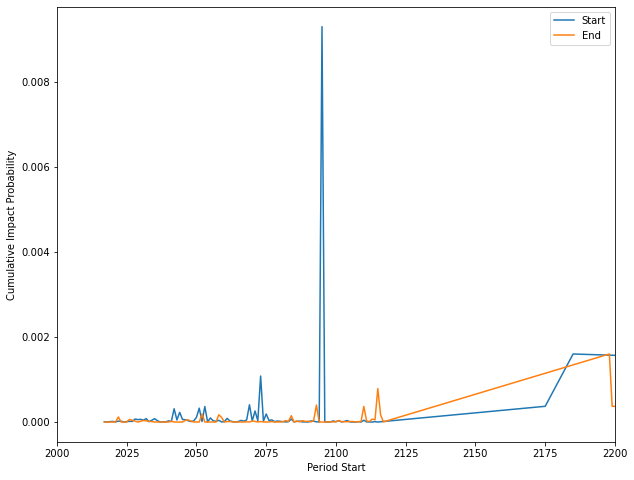

In [32]:
plt.figure(figsize=(10, 8))
sns.lineplot(x=impact_group_start.index, y='Cumulative Impact Probability', data=impact_group_start, label="Start")
sns.lineplot(x=impact_group_end.index, y='Cumulative Impact Probability', data=impact_group_end, label="End")
plt.xlim((2000, 2200))
plt.show()